In [3]:
#Importing header files

import pandas as pd
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

#Sample_Size
sample_size=2000

#Reading the file
data = pd.read_csv("G:\Data Science ML AI\Python files\Projects\Project_Banking_Inferences\Banking_dataset.csv")
data.head(20)

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes
5,LA006,Yes,credit_card,7.88%,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,Less than 5,No,Yes
6,LA007,Yes,debt_consolidation,14.96%,194.02,10.714418,4.00,667,3180.041667,3839,76.8,1,Less than 5,No,No
7,LA008,Yes,all_other,11.14%,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,Less than 5,No,No
8,LA009,Yes,home_improvement,11.34%,87.19,11.407565,17.25,682,3989.000000,69909,51.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes


In [5]:
#calculating Z critical score
z_critical = stats.norm.ppf(q = 0.95)
print(z_critical)

1.6448536269514722


In [6]:
#calculating critical value
critical_value = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                       df = 6) # Df = number of variable categories(in purpose) - 1
print(critical_value)

12.591587243743977


In [7]:
#Task 1: Confidence Interval
#Sampling the dataframe
data_sample = data.sample(n = sample_size, random_state = 0)
data_sample.head(20)

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
3343,LA003344,Yes,all_other,11.89%,49.75,10.829729,16.87,687,2314.958333,962,64.1,0,Less than 5,No,Yes
9,LA0010,Yes,debt_consolidation,12.21%,84.12,10.203592,10.00,707,2730.041667,5630,23.0,0,Less than 5,No,Yes
1741,LA001742,Yes,debt_consolidation,16.95%,712.54,11.918391,13.61,672,4830.041667,16473,94.1,0,Less than 5,Yes,Yes
5160,LA005161,Yes,debt_consolidation,17.39%,286.78,11.189962,19.59,667,7020.000000,19892,67.0,1,Less than 5,No,Yes
7760,LA007761,No,credit_card,13.12%,202.51,9.392662,4.40,657,898.958333,5251,49.3,0,Less than 10,No,Yes
6261,LA006262,Yes,debt_consolidation,11.83%,99.41,10.645425,14.46,697,3090.041667,6297,76.8,0,Less than 5,No,Yes
390,LA00391,Yes,debt_consolidation,8.38%,189.08,10.609057,12.50,727,2550.000000,7386,42.4,0,Less than 5,No,Yes
8943,LA008944,No,home_improvement,9.32%,127.79,11.512925,10.78,737,2310.041667,116648,15.6,0,Less than 5,No,Yes
7695,LA007696,Yes,small_business,15.65%,699.73,11.484526,3.60,722,5657.958333,16930,22.6,0,Less than 5,No,No
4041,LA004042,Yes,debt_consolidation,9.63%,449.32,11.150161,14.57,762,15119.958330,14992,34.6,0,Less than 5,No,Yes


In [8]:
#Finding the mean of the sample
sample_mean = data_sample['installment'].mean()
print("Sample mean is:", sample_mean)

Sample mean is: 317.61096499999996


In [9]:
#Finding the standard deviation of the sample
sample_std = data_sample['installment'].std()
print("Std dev of sample is:", sample_std)

Std dev of sample is: 207.64991593475952


In [10]:
#Finding the margin of error
margin_of_error = z_critical * (sample_std/math.sqrt(sample_size))
print("Margin of error is:",margin_of_error)

Margin of error is: 7.637373299879691


In [11]:
#Finding the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("The confidence interval is:", confidence_interval)

The confidence interval is: (309.97359170012027, 325.24833829987966)


In [12]:
#Finding the true mean
true_mean = data['installment'].mean()
print("True mean of data is:", true_mean)

True mean of data is: 319.08941323867265


In [13]:
#Task 2:CLT
#Different sample sizes to take
sample_size = np.array([20,50,100])


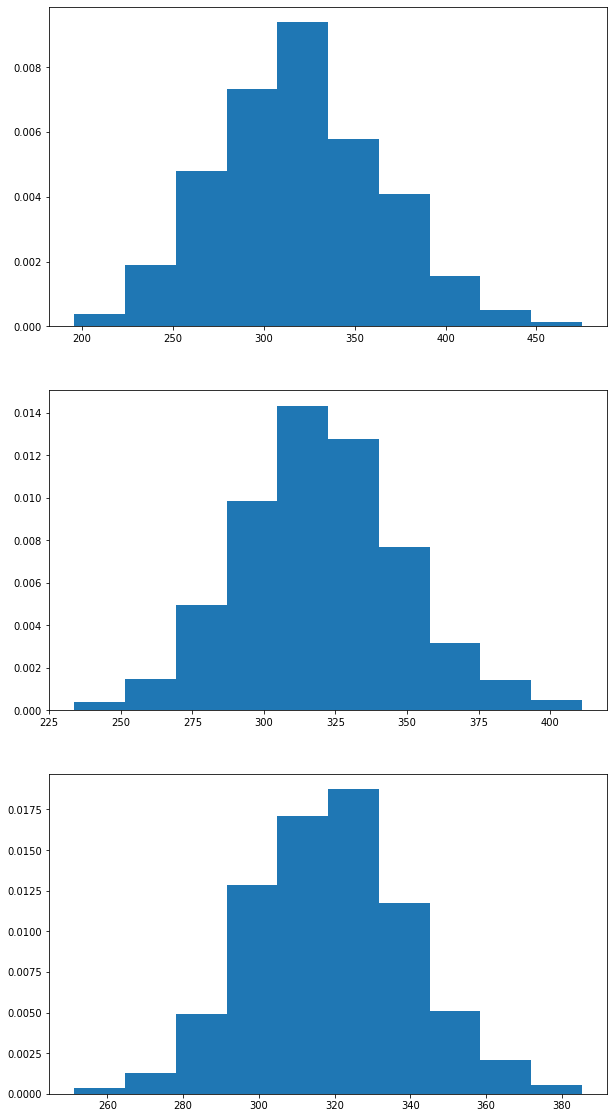

In [16]:
#Creating different subplots
fig, axes = plt.subplots(3,1, figsize=(10,20))

#Running loop to iterate through rows
for i in range(len(sample_size)):
    
    #initialising a list
    m = []
    
    #Loop to implement the no. of samples
    for j in range(1000):
        
        #Finding mean of a random sample
        mean = data['installment'].sample(sample_size[i]).mean()
        
        #Appending the mean to the list
        m.append(mean)
        
    #Converting the list to series
    mean_series = pd.Series(m)
    
    #Plotting the histogram for the series
    axes[i].hist(mean_series, normed = True)
    
#Displaying the plot
plt.show()

In [18]:
#Task 3: Small Business Interests
#people with purpose as 'small_business' have been given int.rate more due to the risk assosciated

#Let's do a hypothesis testing(one-sided) on that belief
#Null Hypothesis = H0 : μ = 12%  --> There is no difference in interest rate being given to people with purpose as 'small_business'

#Alternate Hypothesis = H1 : μ > 12% --> Interest rate being given to people with purpose as 'small_business' is higher than the average interest rate

# Removing the last character from the values in column
data['int.rate'] = data['int.rate'].map(lambda x: str(x)[:-1])

#Dividing the column values by 100
data['int.rate'] = data['int.rate'].astype(float)/100
data.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [20]:
#Applying ztest for the hypothesis
#Let's do a hypothesis testing(one-sided) on that belief
#Null Hypothesis = H0 : μ = 12%  --> There is no difference in interest rate being given to people with purpose as 'small_business'

#Alternate Hypothesis = H1 : μ > 12% --> Interest rate being given to people with purpose as 'small_business' is higher than the average interest rate

z_statistic_1, p_value_1 = ztest(x1 = data[data['purpose'] == 'small_business']['int.rate'], 
                                 value = data['int.rate'].mean(), alternative = 'larger')

print("z-statistic is:", z_statistic_1)
print("p-value is:", p_value_1)

z-statistic is: 12.321276240201554
p-value is: 3.479213190639132e-35


In [21]:
#Task 4: Installment vs Loan Defaulting
#monthly installments (installment column) customers have to pay might have some sort of effect on loan defaulters
#Let's do a hypothesis testing(two-sided) on that belie
#Null Hypothesis = H0 : μ¨D(yes)==¨Dμ(no) --> There is no difference in installments being paid by loan defaulters and loan non defaulters
#Alternate Hypothesis = H1 : μ¨D(yes)¨=! Dμ(no) --> There is difference in installments being paid by loan defaulters and loan non defaulters

z_statistic_2, p_value_2 = ztest(x1 = data[data['paid.back.loan'] == 'No']['installment'], 
                                 x2 = data[data['paid.back.loan'] == 'Yes']['installment'])

print("z-statistic 2 is:", z_statistic_2)
print("p-value 2 is:", p_value_2)

z-statistic 2 is: 4.894575287952092
p-value 2 is: 9.85182562491764e-07


In [23]:
#Task 5: Purpose vs Loan Defaulting
# we think that here is a strong association between purpose of the loan(purpose column) of a person and whether that person has paid back loan (paid.back.loan column)
#Since both are categorical columns, we will do chi-square test to test the same
#Null Hypothesis : Distribution of purpose across all customers is same.
#Alternative Hypothesis : Distribution of purpose for loan defaulters and non defaulters is different.

# Subsetting the dataframe
yes = data[data['paid.back.loan'] == 'Yes']['purpose'].value_counts()
yes


debt_consolidation    3354
all_other             1944
credit_card           1116
home_improvement       522
small_business         447
major_purchase         388
educational            274
Name: purpose, dtype: int64

In [24]:
no = data[data['paid.back.loan'] == 'No']['purpose'].value_counts()
no

debt_consolidation    603
all_other             387
small_business        172
credit_card           146
home_improvement      107
educational            69
major_purchase         49
Name: purpose, dtype: int64

In [25]:
#Concating yes and no into a single dataframe
observed = pd.concat([yes.transpose(), no.transpose()], 1,keys=['Yes','No'])
print(observed)

                     Yes   No
all_other           1944  387
credit_card         1116  146
debt_consolidation  3354  603
educational          274   69
home_improvement     522  107
major_purchase       388   49
small_business       447  172


In [27]:
#Implementing chi-square test

chi2, p, dof, ex = chi2_contingency(observed)

print("Critical value is:", critical_value)

print("chi statistic is:", chi2)

Critical value is: 12.591587243743977
chi statistic is: 96.98469589063261
